In [1]:
#Imports
from nn import nn
import numpy as np
import sklearn
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt

In [2]:
#Get digits dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets
y_onehot=np.zeros((y.shape[0],10))
y_onehot[np.arange(y.shape[0]),y["class"]]=1

In [3]:
# Sample 80/20 train/test split
train_idx=np.random.randint(0,len(X)-1,int(len(X)*0.8))
train_X=np.array(X.iloc[list(train_idx),:])
train_y=np.array(y_onehot[train_idx])
test_idx=set(range(len(X)))-set(train_idx)
test_X=np.array(X.iloc[list(test_idx),:])
test_y=np.array(y_onehot[list(test_idx)])

In [10]:
#Initialize NN
NNet=nn.NeuralNetwork(
    nn_arch=[{'input_dim':64,'output_dim':16,'activation':"sigmoid"},{'input_dim':16,'output_dim':64,'activation':"relu"},{'input_dim':64,'output_dim':10,"activation":"sigmoid"}],
    lr=0.0005,
    seed=37,
    batch_size=50,
    epochs=100,
    loss_function="BCE"
)

In [11]:
# Train NN
(train_error,val_error)=NNet.fit(train_X,train_y,test_X,test_y)

Done with iteration 0. Train error: 0.99 Val error: 0.98
Done with iteration 1. Train error: 0.98 Val error: 0.97
Done with iteration 2. Train error: 0.96 Val error: 0.95
Done with iteration 3. Train error: 0.95 Val error: 0.94
Done with iteration 4. Train error: 0.94 Val error: 0.93
Done with iteration 5. Train error: 0.93 Val error: 0.92
Done with iteration 6. Train error: 0.92 Val error: 0.91
Done with iteration 7. Train error: 0.91 Val error: 0.9
Done with iteration 8. Train error: 0.89 Val error: 0.88
Done with iteration 9. Train error: 0.89 Val error: 0.87
Done with iteration 10. Train error: 0.88 Val error: 0.86
Done with iteration 11. Train error: 0.87 Val error: 0.85
Done with iteration 12. Train error: 0.85 Val error: 0.84
Done with iteration 13. Train error: 0.84 Val error: 0.83
Done with iteration 14. Train error: 0.83 Val error: 0.82
Done with iteration 15. Train error: 0.82 Val error: 0.8
Done with iteration 16. Train error: 0.81 Val error: 0.79
Done with iteration 17. Tr

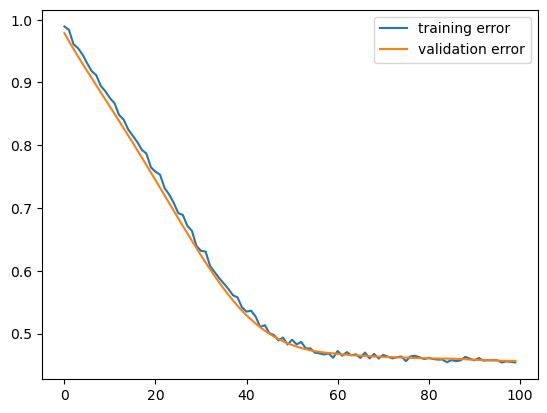

In [12]:
plt.plot(range(NNet._epochs),list(train_error))
plt.plot(range(NNet._epochs),list(val_error))
plt.legend(["training error","validation error"])